In [1]:
install.packages("caret")
install.packages("AUC")
install.packages("MASS")
install.packages("e1071")
install.packages("kknn")
install.packages("nnet")

library(caret)
library(AUC)
library(MASS)
library(e1071)
library(kknn)
library(nnet)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: ggplot2

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

AUC 0.3.0

Type AUCNews() to see the change log and ?AUC to get an overview.


Attaching package: ‘AUC’


The following objects are masked from ‘package:caret’:

    sensitivity, specificity



Attaching package: ‘kknn’


The following object is masked from ‘package:caret’:

    contr.dummy




In [2]:
train <- read.csv("Credit_train.csv")
test <- read.csv("Credit_test.csv")
train <- na.omit(train)
test <- na.omit(test)

Call:
lda(DEFAULT ~ ., data = train)

Prior probabilities of groups:
        N         Y 
0.9139355 0.0860645 

Group means:
     BUSAGE  BUSTYPEB   BUSTYPEC   BUSTYPED     BUSTYPEE    BUSTYPEF
N 116.88465 0.2442296 0.06228055 0.08282968 0.0009785299 0.002820469
Y  85.82885 0.2652812 0.04706601 0.07579462 0.0006112469 0.003667482
  MAXLINEUTIL   DAYSDELQ TOTACBAL
N   0.4498486 0.08311748 22791.31
Y   0.7775695 3.76711491 27707.46

Coefficients of linear discriminants:
                      LD1
BUSAGE      -2.522905e-03
BUSTYPEB    -2.382606e-02
BUSTYPEC    -1.910992e-01
BUSTYPED    -1.071924e-01
BUSTYPEE    -2.338590e-01
BUSTYPEF     3.398732e-01
MAXLINEUTIL  2.059445e+00
DAYSDELQ     6.988151e-02
TOTACBAL    -8.153696e-06

,LD1
BUSAGE,-2.522905e-03
BUSTYPEB,-2.382606e-02
BUSTYPEC,-1.910992e-01
BUSTYPED,-1.071924e-01
BUSTYPEE,-2.338590e-01
BUSTYPEF,3.398732e-01
MAXLINEUTIL,2.059445e+00
DAYSDELQ,6.988151e-02
TOTACBAL,-8.153696e-06


N    Y 
4680   26

Confusion Matrix and Statistics

   
       N    Y
  N 4289  391
  Y    8   18
                                         
               Accuracy : 0.9152         
                 95% CI : (0.9069, 0.923)
    No Information Rate : 0.9131         
    P-Value [Acc > NIR] : 0.3134         
                                         
                  Kappa : 0.0731         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.044010       
            Specificity : 0.998138       
         Pos Pred Value : 0.692308       
         Neg Pred Value : 0.916453       
             Prevalence : 0.086910       
         Detection Rate : 0.003825       
   Detection Prevalence : 0.005525       
      Balanced Accuracy : 0.521074       
                                         
       'Positive' Class : Y              
                                         

[1] 0.7354122

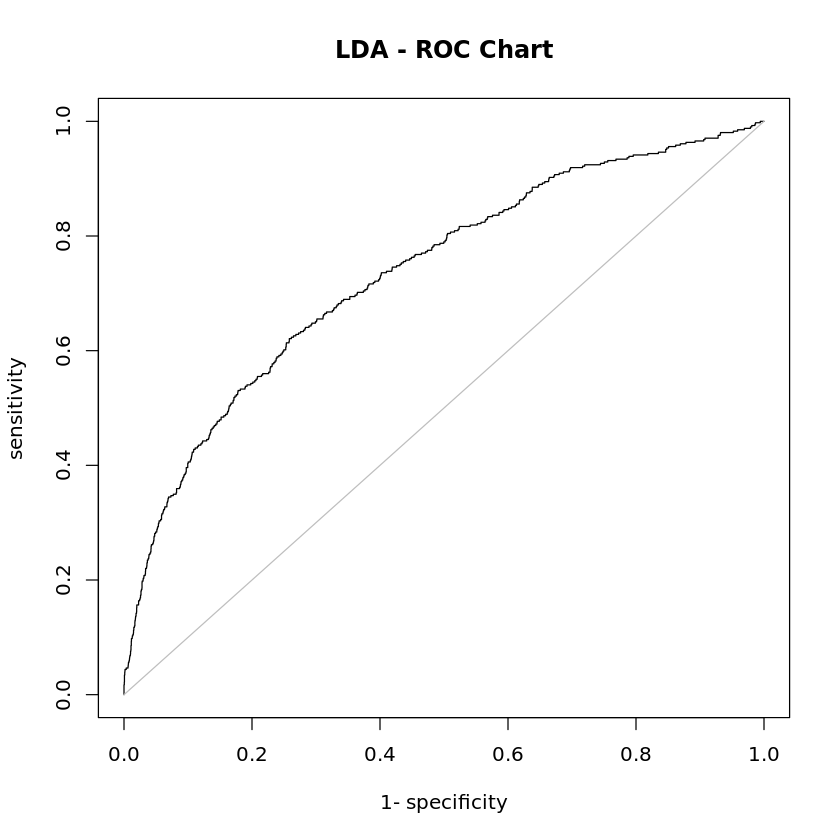

In [3]:
#Question 1-3

model.LDA <- lda(DEFAULT~., data=train)
model.LDA
model.LDA$scaling

pc <- predict(model.LDA, test)
summary(pc$class)
xtab <- table(pc$class, test$DEFAULT)
caret::confusionMatrix(xtab, positive = "Y")

pb <- NULL
pb <- pc$posterior
pb <- as.data.frame(pb)
pred.LDA <- data.frame(test$DEFAULT, pb$Y)
colnames(pred.LDA) <- c("target","score")


labels <- as.factor(ifelse(pred.LDA$target=="Y", 1, 0))
predictions <- pred.LDA$score
auc(roc(predictions, labels), min = 0, max = 1)
plot(roc(predictions, labels), min=0, max=1, type="l", main="LDA - ROC Chart")

In [4]:
train$DEFAULT <- as.factor(ifelse(train$DEFAULT=="Y", 1, 0))
test$DEFAULT <- as.factor(ifelse(test$DEFAULT=="Y", 1, 0))
table(train$DEFAULT)
table(test$DEFAULT)


    0     1 
17373  1636 


   0    1 
4297  409 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = DEFAULT ~ BUSAGE + MAXLINEUTIL + DAYSDELQ + TOTACBAL, 
    family = binomial(logit), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.1202  -0.4706  -0.3231  -0.2478   3.2583  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.134e+00  6.730e-02 -46.558  < 2e-16 ***
BUSAGE      -3.424e-03  3.580e-04  -9.562  < 2e-16 ***
MAXLINEUTIL  2.043e+00  8.531e-02  23.954  < 2e-16 ***
DAYSDELQ     7.411e-02  6.574e-03  11.273  < 2e-16 ***
TOTACBAL    -5.501e-06  1.353e-06  -4.065  4.8e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 11152.1  on 19008  degrees of freedom
Residual deviance:  9918.6  on 19004  degrees of freedom
AIC: 9928.6

Number of Fisher Scoring iterations: 6


 pb      
 0:4681  
 1:  25  

Confusion Matrix and Statistics

   
pc     0    1
  0 4290  391
  1    7   18
                                          
               Accuracy : 0.9154          
                 95% CI : (0.9071, 0.9232)
    No Information Rate : 0.9131          
    P-Value [Acc > NIR] : 0.2952          
                                          
                  Kappa : 0.0737          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.044010        
            Specificity : 0.998371        
         Pos Pred Value : 0.720000        
         Neg Pred Value : 0.916471        
             Prevalence : 0.086910        
         Detection Rate : 0.003825        
   Detection Prevalence : 0.005312        
      Balanced Accuracy : 0.521190        
                                          
       'Positive' Class : 1               
                                          

[1] 0.7373365

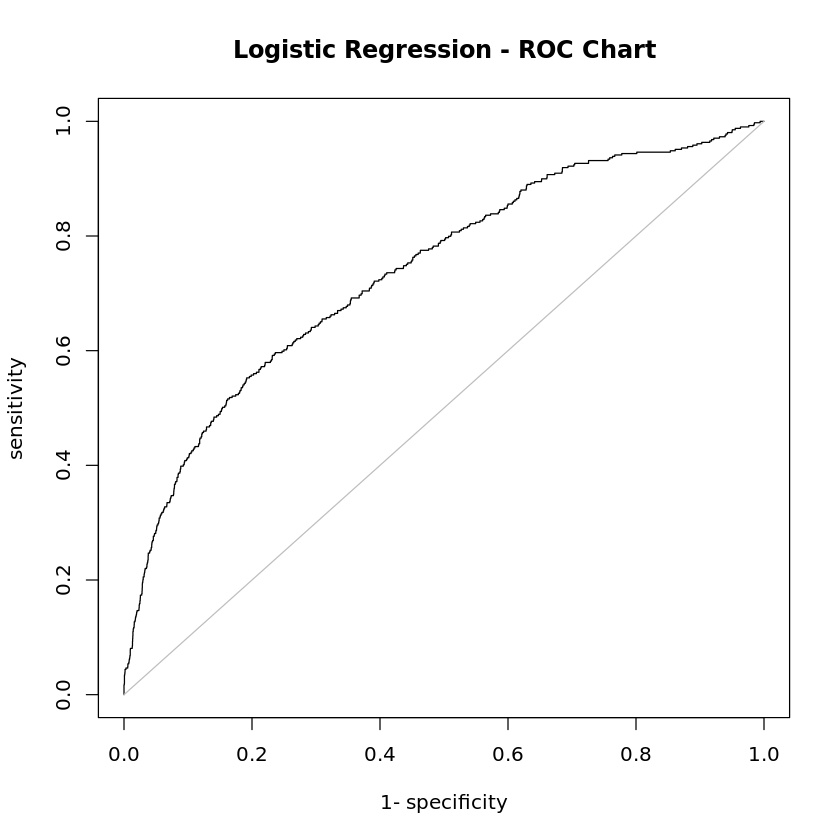

In [5]:
#Question 5-7

model.LogReg <- glm(DEFAULT~BUSAGE+MAXLINEUTIL+DAYSDELQ+TOTACBAL,family=binomial(logit), data=train)
summary(model.LogReg)

pb <- NULL
pb <- predict(model.LogReg, test)
pb <- as.data.frame(pb)
pred.LogReg <- data.frame(test$DEFAULT, 1/(1+(exp(1)^-pb)))
colnames(pred.LogReg) <- c("target","score")

pc <- NULL
pc <- ifelse(pb > 0.5,"1","0")
summary(pc)
xtab <- table(pc, test$DEFAULT)
caret::confusionMatrix(xtab, positive = "1")


labels <- pred.LogReg$target
predictions <- pred.LogReg$score
auc(roc(predictions, labels), min = 0, max = 1)
plot(roc(predictions, labels), min=0, max=1, type="l", main="Logistic Regression - ROC Chart")

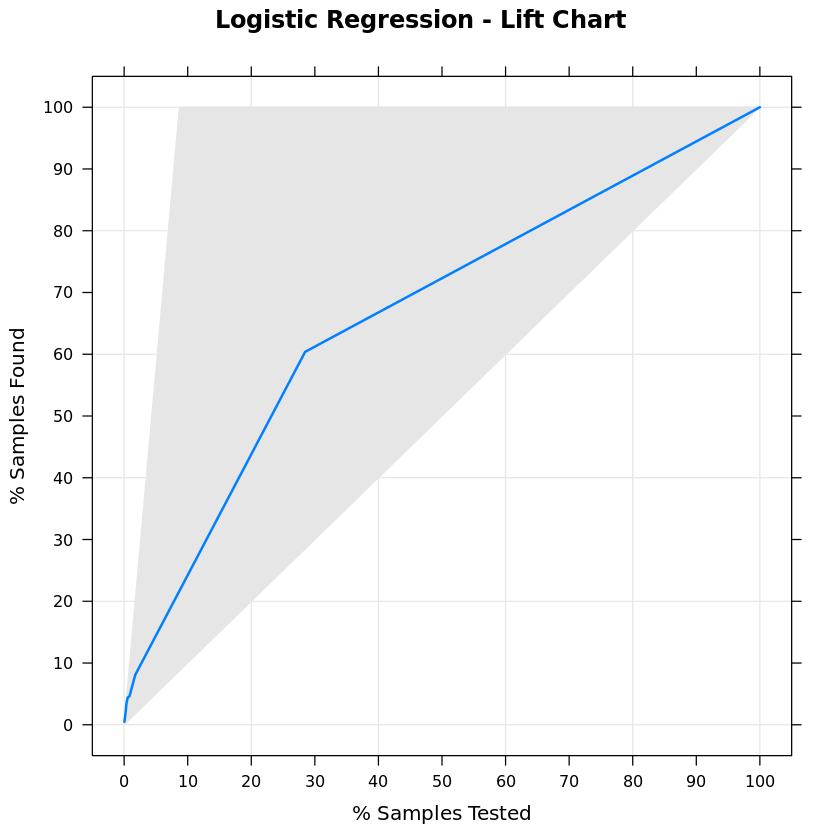

In [6]:
#Question 9
lift.LogReg <- lift(target ~ score, data = pred.LogReg, cuts=10, class="1")
xyplot(lift.LogReg, main="Logistic Regression - Lift Chart", type=c("l","g"), lwd=2
       , scales=list(x=list(alternating=FALSE,tick.number = 10)
                     ,y=list(alternating=FALSE,tick.number = 10)))

In [7]:
train <- read.csv("Credit_train.csv")
test <- read.csv("Credit_test.csv")
train <- na.omit(train)
test <- na.omit(test)

Confusion Matrix and Statistics

   
pc     N    Y
  N 4171  390
  Y  126   19
                                          
               Accuracy : 0.8904          
                 95% CI : (0.8811, 0.8991)
    No Information Rate : 0.9131          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0242          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.046455        
            Specificity : 0.970677        
         Pos Pred Value : 0.131034        
         Neg Pred Value : 0.914492        
             Prevalence : 0.086910        
         Detection Rate : 0.004037        
   Detection Prevalence : 0.030812        
      Balanced Accuracy : 0.508566        
                                          
       'Positive' Class : Y               
                                          

[1] 0.5291472

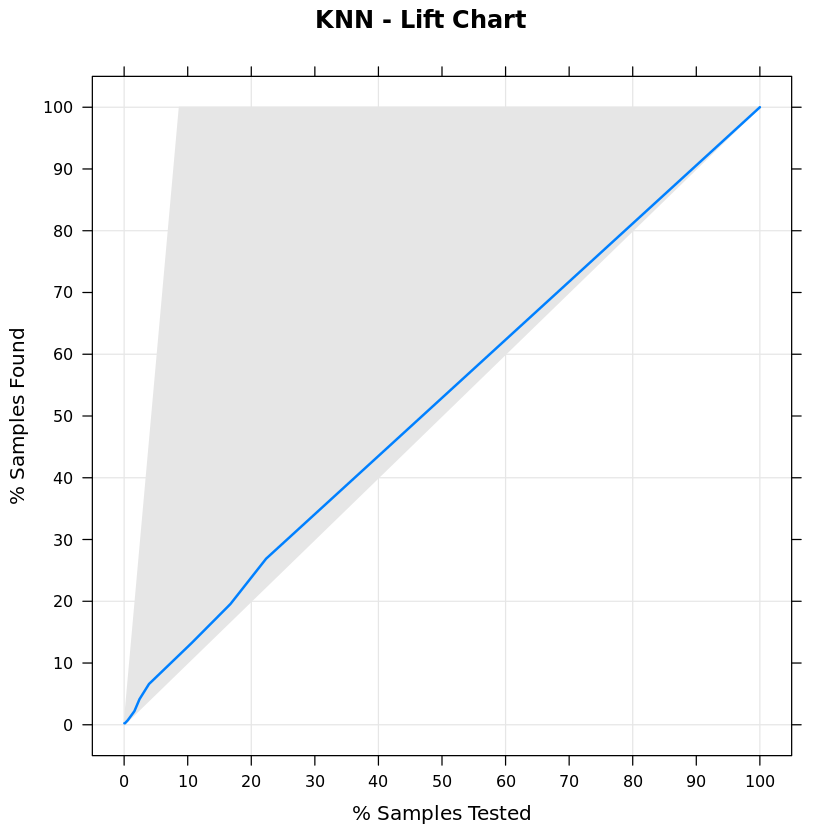

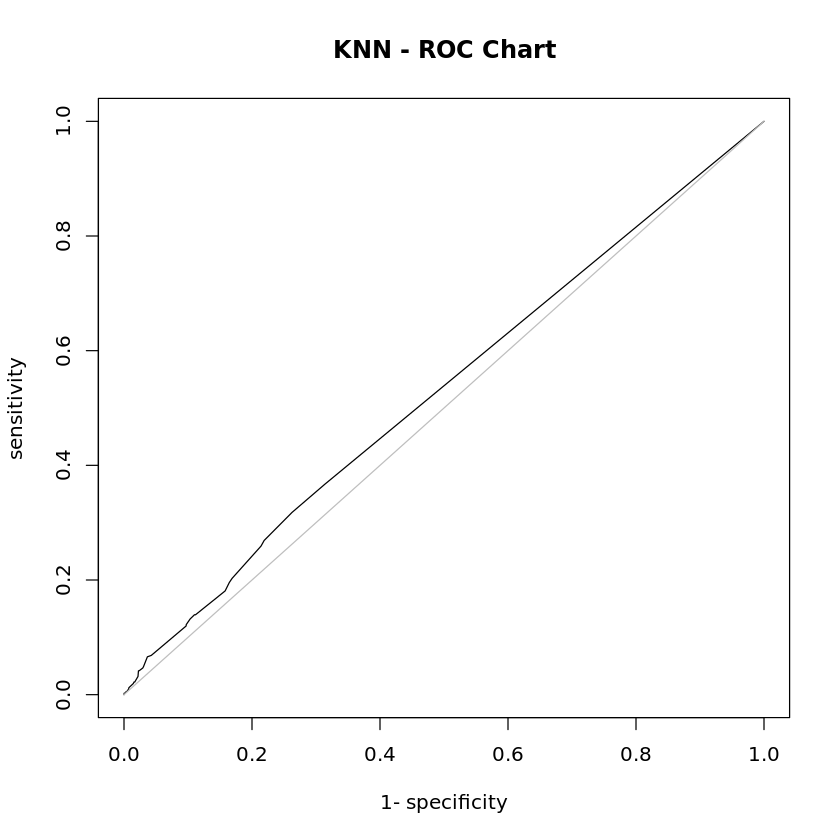

In [8]:
#Question 10-12
model.KNN <- kknn(DEFAULT~., train, test, k=5, distance = 2, scale=FALSE)

pc <- NULL
pc <- predict(model.KNN, test, type="raw")
xtab <- table(pc, test$DEFAULT)
caret::confusionMatrix(xtab, positive="Y")

pb <- NULL
pb <- predict(model.KNN, test, type="prob")
pb <- as.data.frame(pb)
pred.KNN <- data.frame(test$DEFAULT, pb$Y)
colnames(pred.KNN) <- c("target","score")
lift.KNN <- lift(target ~ score, data = pred.KNN, cuts=10, class="Y")
xyplot(lift.KNN, main="KNN - Lift Chart", type=c("l","g"), lwd=2
       , scales=list(x=list(alternating=FALSE,tick.number = 10)
                     ,y=list(alternating=FALSE,tick.number = 10)))

labels <- as.factor(ifelse(pred.KNN$target=="Y", 1, 0))
predictions <- pred.KNN$score
auc(roc(predictions, labels), min = 0, max = 1)
plot(roc(predictions, labels), min=0, max=1, type="l", main="KNN - ROC Chart")

# weights:  111
initial  value 21947.139181 
iter  10 value 5572.908021
iter  20 value 5572.680877
final  value 5572.624992 
converged


a 9-10-1 network with 111 weights
options were - entropy fitting 
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 i5->h1 i6->h1 i7->h1 i8->h1 i9->h1 
 -0.42  -0.54  -0.54   0.00  -0.37   0.60  -0.52  -0.54   0.07  -0.62 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 i5->h2 i6->h2 i7->h2 i8->h2 i9->h2 
 -0.17  -1.07   0.51   0.42   0.09   0.32   0.20   0.09  -0.41  -0.39 
 b->h3 i1->h3 i2->h3 i3->h3 i4->h3 i5->h3 i6->h3 i7->h3 i8->h3 i9->h3 
  8.49  -7.78  -5.77   1.45  -1.73   0.01  -0.82  -0.29  -0.50  20.04 
 b->h4 i1->h4 i2->h4 i3->h4 i4->h4 i5->h4 i6->h4 i7->h4 i8->h4 i9->h4 
  0.06  -0.38   0.20  -0.43   0.45   0.45  -0.60  -0.35  -0.40  -0.52 
 b->h5 i1->h5 i2->h5 i3->h5 i4->h5 i5->h5 i6->h5 i7->h5 i8->h5 i9->h5 
 -0.34  -0.49   0.44   0.27   0.33  -0.20  -0.46   0.43  -0.22 -12.44 
 b->h6 i1->h6 i2->h6 i3->h6 i4->h6 i5->h6 i6->h6 i7->h6 i8->h6 i9->h6 
  0.53   0.56  -0.02   0.27   0.09   0.56  -0.44  -0.64  -0.57   0.34 
 b->h7 i1->h7 i2->h7 i3->h7 i4->h7 i5->h7 i6->h7 i7->h7 i8->h7 i9->h7 
 -0.22  -1.

[1] 0.7272829

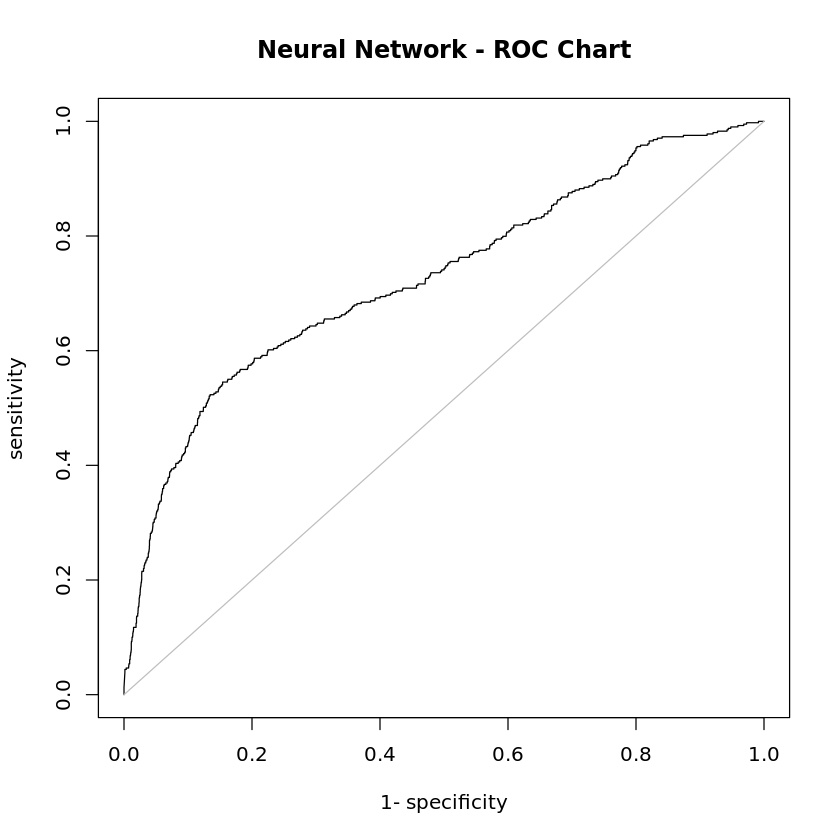

In [13]:
#Question 13
model.ANN <- nnet(DEFAULT~., train, size=10,  MaxNWts=10000, maxit=10000)
summary(model.ANN)

labels <- as.factor(ifelse(pred.ANN$target=="Y", 1, 0))
predictions <- pred.ANN$score
auc(roc(predictions, labels), min = 0, max = 1)
plot(roc(predictions, labels), min=0, max=1, type="l", main="Neural Network - ROC Chart")



Call:
svm(formula = DEFAULT ~ ., data = train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.1 

Number of Support Vectors:  3318

 ( 1728 1590 )


Number of Classes:  2 

Levels: 
 N Y




[1] 0.5205497

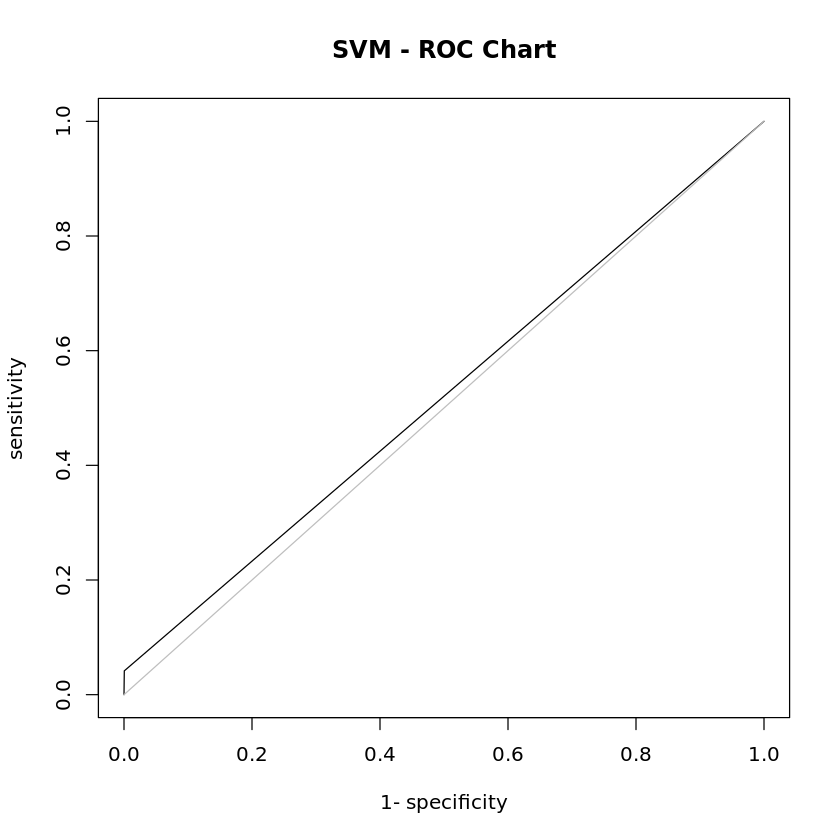

In [17]:
#Question 14

model.SVM <- svm(DEFAULT~., train, kernel ='linear')
summary(model.SVM)

labels <- as.factor(ifelse(pred.SVM$target=="Y", 1, 0))
predictions <- pred.SVM$score
auc(roc(predictions, labels), min = 0, max = 1)
plot(roc(predictions, labels), min=0, max=1, type="l", main="SVM - ROC Chart")